In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import f2_majormuts_trajectory as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
df = pd.read_csv(parent_script.out_dir + f'pv_trajectory_t8.csv', index_col = 0)
print(df.shape)

(4066, 100)


## form truncated

In [3]:
df['Max'] = df.apply('max', axis = 'columns')

In [4]:
thresholds = [0.10, 0.05, 0.04, 0.03, 0.02, 0.01]

for threshold in thresholds:
    n = sum(df['Max'] > threshold)
    print(f'Above {threshold:.0%}: {n} genotypes')

Above 10%: 9 genotypes
Above 5%: 22 genotypes
Above 4%: 34 genotypes
Above 3%: 37 genotypes
Above 2%: 60 genotypes
Above 1%: 117 genotypes


## plot truncated

In [5]:
threshold = 0.05

df3 = df[df['Max'] > threshold]

dfm3 = df3.drop(['Max'], axis = 'columns')
dfm3 = dfm3.melt(id_vars = 'Full genotype', var_name = 'Sample name', value_name = 'Frequency')
dfm3['Sample'] = [int(s.split()[-1]) for s in dfm3['Sample name']]

# Shuffle rows for random colors
dfm3 = dfm3.sample(frac = 1)

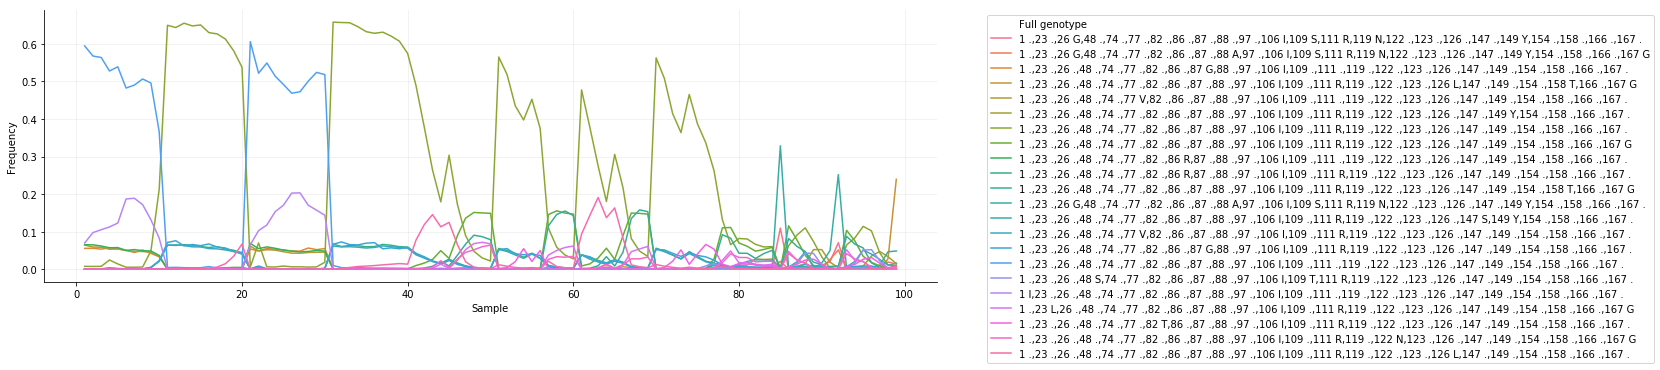

In [6]:
fig, ax = plt.subplots(figsize = (16, 5))
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm3,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

## plot subset of regimes

In [13]:
dfm3.head()

,Full genotype,Sample name,Frequency,Sample
1669,"1 .,23 .,26 G,48 .,74 .,77 .,82 .,86 .,87 .,88...",Fq 76,0.0,76
461,"1 .,23 .,26 G,48 .,74 .,77 .,82 .,86 .,87 .,88...",Fq 21,0.0,21
2160,"1 .,23 .,26 .,48 .,74 .,77 .,82 .,86 .,87 G,88...",Fq 99,0.0,99
787,"1 .,23 .,26 .,48 .,74 .,77 .,82 .,86 .,87 .,88...",Fq 36,0.0,36
1768,"1 .,23 .,26 .,48 .,74 .,77 V,82 .,86 .,87 .,88...",Fq 81,0.0,81


/ahg/regevdata/users/maxwshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


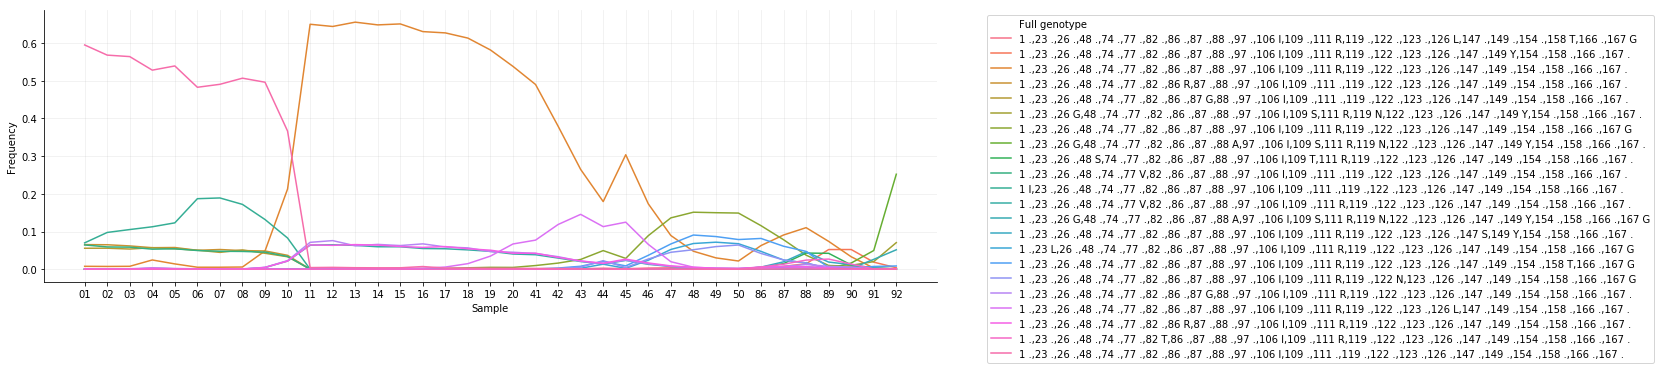

In [17]:
def get_campaign_a(dfm3):
    allowed_samples = list(range(1, 20 + 1)) + list(range(41, 50 + 1)) + list(range(86, 92 + 1))
    crit = (dfm3['Sample'].isin(allowed_samples))
    dfs = dfm3[crit]
    dfs['Sample'] = [str(s).zfill(2) for s in dfs['Sample']]
    return dfs

dfs = get_campaign_a(dfm3)

fig, ax = plt.subplots(figsize = (16, 5))
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfs,
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

## Plot PACE only

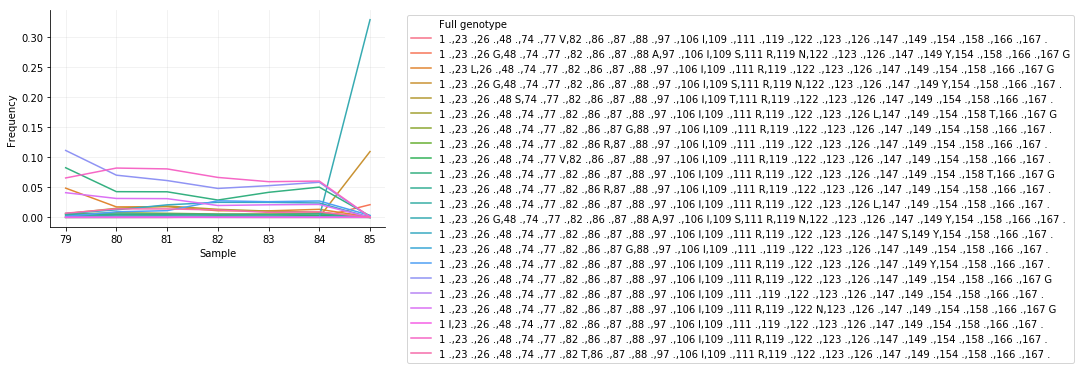

In [7]:
crit = (dfm3['Sample'] >= 79) & (dfm3['Sample'] <= 85)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

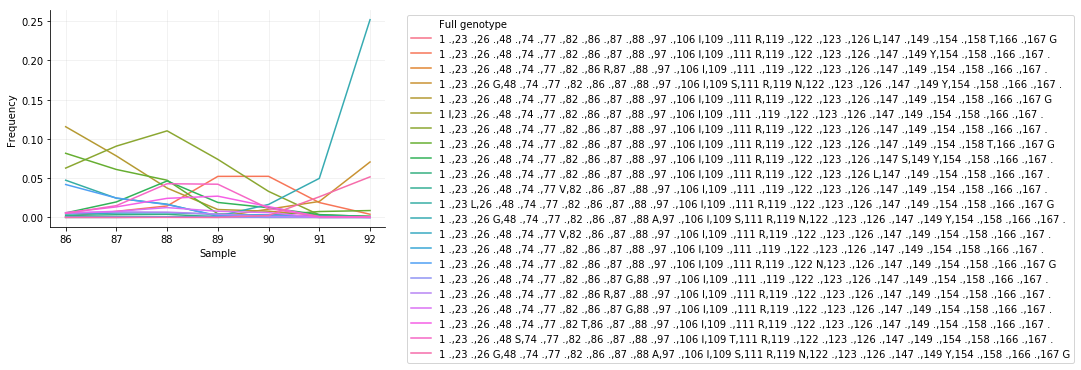

In [8]:
crit = (dfm3['Sample'] >= 86) & (dfm3['Sample'] <= 92)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

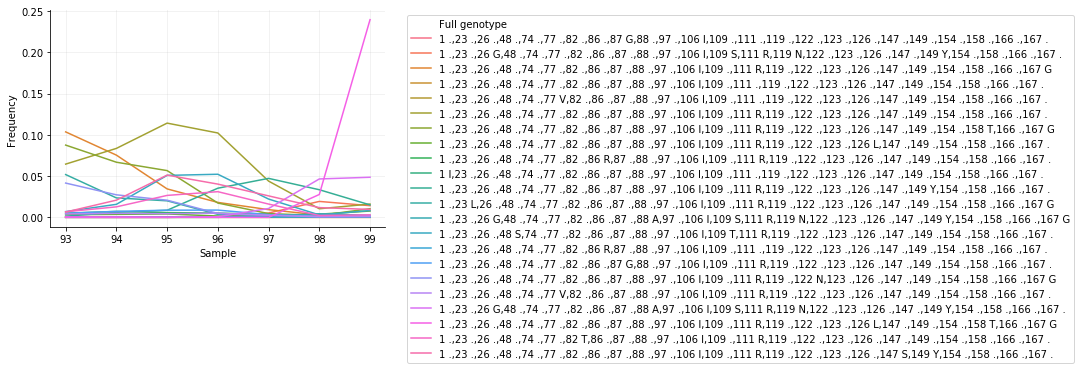

In [9]:
crit = (dfm3['Sample'] >= 93) & (dfm3['Sample'] <= 99)
dfm_paceonly = dfm3[crit]

fig, ax = plt.subplots()
sns.lineplot(
    x = 'Sample',
    y = 'Frequency',
    hue = 'Full genotype',
    data = dfm_paceonly,
#     style = 'Full genotype',
    ax = ax,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')